In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fnmatch

from VIGOR_utils import *
from VIGOR_plotting import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/test.mplstyle')

In [92]:
animalList - intact

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [93]:
animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43']

intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']

lesion = ['RatF30', 'RatF31', 'RatM30', 'RatF40', 'RatF41', 'RatM41', 'RatM42']


brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',
               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal'}


rat_markers = {}
intact_map = plt.cm.get_cmap('winter')
lesion_map = plt.cm.get_cmap('autumn')

markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}
colormaps = {'normal': intact_map, 'DLS': lesion_map, 'DMS': lesion_map}

for index, animal in enumerate(animalList):
    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 'd', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=[colormaps[brainstatus[animal]](index/len(animalList)), 's', lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")


In [3]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))


$\alpha_0$: 0.010
$\alpha_t$: 0.003
$\alpha_R$: 0.627
$\gamma_0$: 0.388
$\gamma_t$: 0.832
$\gamma_R$: 0.580
$\mu_0$: 0.0
$\mu_t$: 0.5113
$\mu_R$: 0.1596
$\sigma_0$: 0.0001
$\sigma_t$: 0.3256
$\sigma_R$: 0.3463


(-6.0, 6.0)

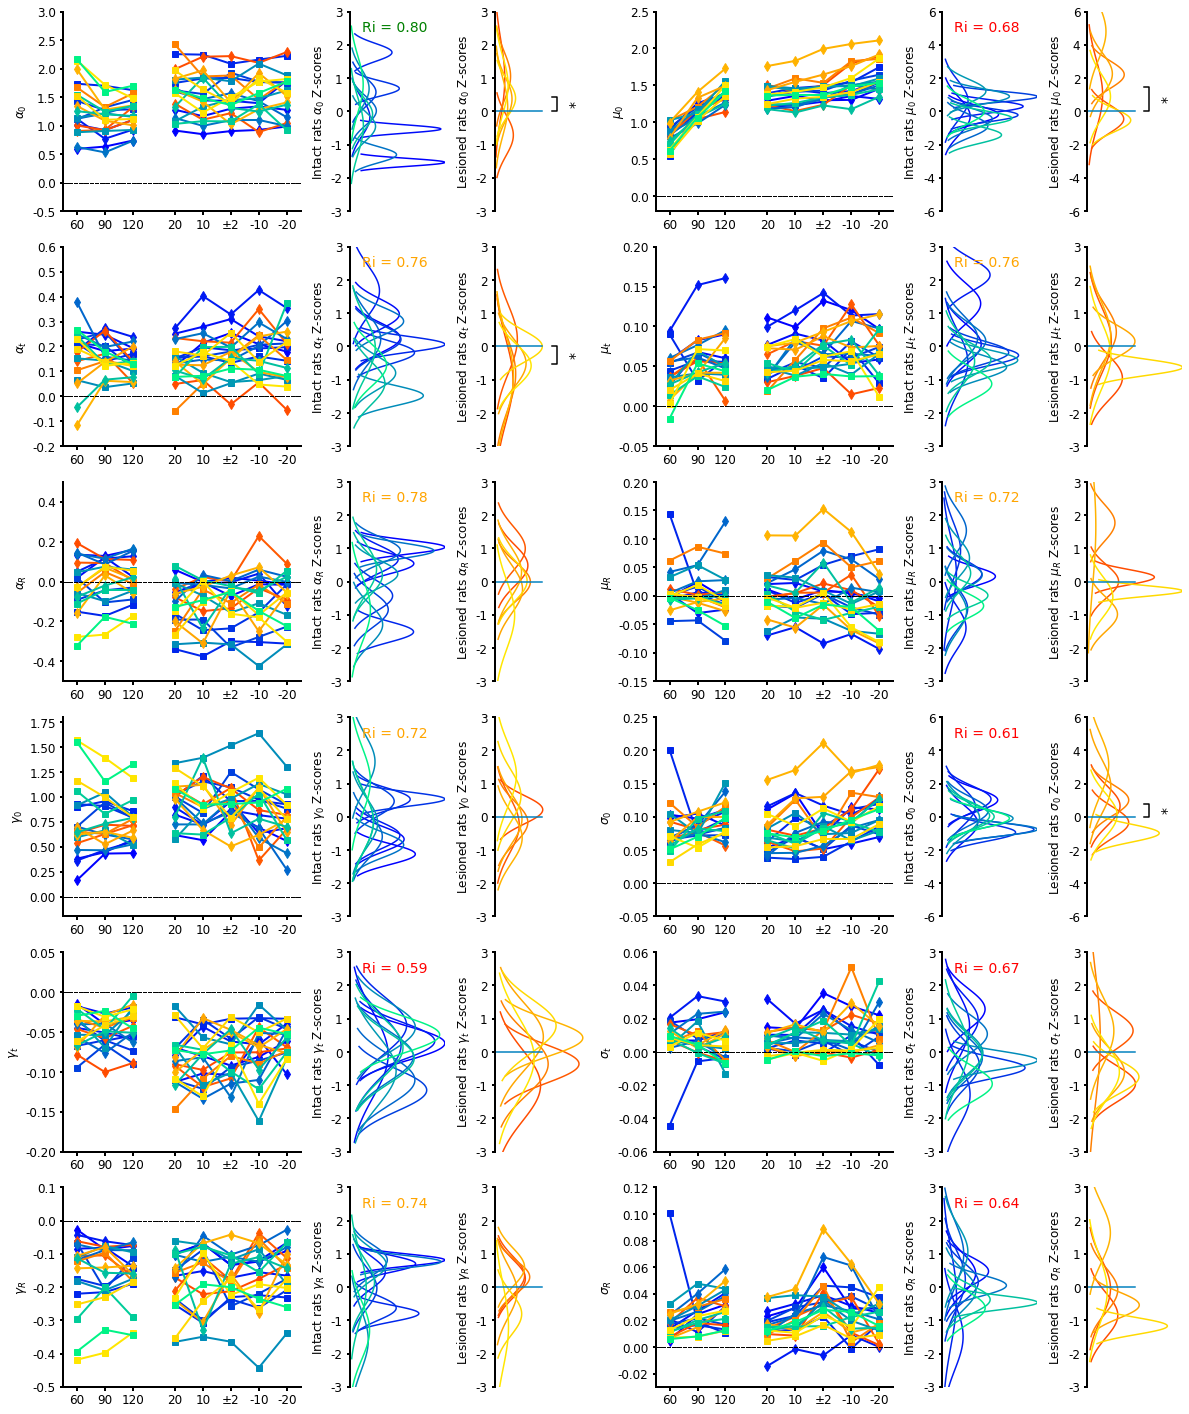

In [4]:
fig, axs = plt.subplots(6, 6, figsize=(42/2.56, 50/2.56), gridspec_kw={'width_ratios': [5, 2, 2, 5, 2, 2]}, constrained_layout=True)
ylabelsIDLE = [r'$\alpha_0$', r"$\alpha_t$", r"$\alpha_R$", r'$\gamma_0$', r"$\gamma_t$", r"$\gamma_R$"]
ylimsIDLE = [[-.5, 3], [-.2, .6], [-.5, .5], [-.2, 1.8], [-.2, .05], [-.5, .1]]
ylabelsRUN = [r'$\mu_0$', r"$\mu_t$", r"$\mu_R$", r'$\sigma_0$', r"$\sigma_t$", r"$\sigma_R$"]
ylimsRUN = [[-.2, 2.5], [-.05, .2], [-.15, .2], [-.05, .25], [-.06, .06], [-.03, .12], ]

varsIDLE = [alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R]
varsRUN = [mu, mu_t, mu_R, sigma, sigma_t, sigma_R, ]

for animal in animalList:
    for i, (var, ylabel, ylim) in enumerate(zip(varsIDLE, ylabelsIDLE, ylimsIDLE)):
        # x, y = np.arange(8), [var[animal]["60"], var[animal]["90"], var[animal]["120"], var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]]
        axs[i, 0].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 0].set_title(f"")
        axs[i, 0].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 0].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 0].set_ylabel(ylabel)
        axs[i, 0].set_xlim(-.5, 8)
        axs[i, 0].set_ylim(ylim)
        axs[i, 0].axhline(0, color='black', linestyle='--', linewidth=1)

    for i, (var, ylabel, ylim) in enumerate(zip(varsRUN, ylabelsRUN, ylimsRUN)):
        axs[i, 3].plot([0, 1, 2], [var[animal]["60"], var[animal]["90"], var[animal]["120"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1], 
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].plot([3.5, 4.5, 5.5, 6.5, 7.5], [var[animal]["20"], var[animal]["10"], var[animal]["2"], var[animal]["rev10"], var[animal]["rev20"]], 
                        color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1],
                        markersize=6.5, lw=2, linestyle=lines[brainstatus[animal]])
        axs[i, 3].set_title(f"")
        axs[i, 3].set_xticks([0, 1, 2, 3.5, 4.5, 5.5, 6.5, 7.5])
        axs[i, 3].set_xticklabels(["60", "90", "120", "20", "10", "±2", "-10", "-20"])
        axs[i, 3].set_ylabel(ylabel)
        axs[i, 3].set_xlim(-.5, 8)
        axs[i, 3].set_ylim(ylim)
        axs[i, 3].axhline(0, color='black', linestyle='--', linewidth=1)
    




Zalpha = {animal: {key: (alpha[animal][key] - np.mean([alpha[animal][key] for animal in intact]))/np.std([alpha[animal][key] for animal in intact]) for key in alpha[animal]} for animal in animalList}
Zalpha_t = {animal: {key: (alpha_t[animal][key] - np.mean([alpha_t[animal][key] for animal in intact]))/np.std([alpha_t[animal][key] for animal in intact]) for key in alpha_t[animal]} for animal in animalList}
Zalpha_R = {animal: {key: (alpha_R[animal][key] - np.mean([alpha_R[animal][key] for animal in intact]))/np.std([alpha_R[animal][key] for animal in intact]) for key in alpha_R[animal]} for animal in animalList}
Zgamma = {animal: {key: (gamma[animal][key] - np.mean([gamma[animal][key] for animal in intact]))/np.std([gamma[animal][key] for animal in intact]) for key in gamma[animal]} for animal in animalList}
Zgamma_t = {animal: {key: (gamma_t[animal][key] - np.mean([gamma_t[animal][key] for animal in intact]))/np.std([gamma_t[animal][key] for animal in intact]) for key in gamma_t[animal]} for animal in animalList}
Zgamma_R = {animal: {key: (gamma_R[animal][key] - np.mean([gamma_R[animal][key] for animal in intact]))/np.std([gamma_R[animal][key] for animal in intact]) for key in gamma_R[animal]} for animal in animalList}

traitsIDLE = {animal: [] for animal in animalList}
ZvarsIDLE = [Zalpha, Zalpha_t, Zalpha_R, Zgamma, Zgamma_t, Zgamma_R]
for j, zvar in enumerate(ZvarsIDLE):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsIDLE[animal].append(np.mean(zscores))
        if brainstatus[animal] == "normal":
            axs[j, 1].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 2].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    
    Ri = compute_Ri(zvar, intact)
    axs[j, 1].annotate(f'Ri = {Ri:.2f}', xy=(0.125, 0.9), xycoords='axes fraction', color=Ri_color(Ri), fontsize=14, )

    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsIDLE[j]}: {perm:.3f}")
    if perm < 0.05:
        intact_vs_lesion_Zscore(axs[j, 2], 0, 1, perm, 
                                    [0, np.mean([traitsIDLE[animal][j] for animal in animalList if brainstatus[animal] != 'normal'])], 
                                    [ymax/2, ymax/2], yerr=None, dh=ymax/10, barh=ymax/20, fs=14, maxasterix=1)

    # axs[j, 1].set_ylim(xmin, xmax)
    axs[j, 1].set_ylim(-3, 3)
    axs[j, 1].set_xlim(0, ymax)
    axs[j, 1].set_ylabel(f"Intact rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 1].set_xlabel("")
    axs[j, 1].set_xticks([])
    axs[j, 1].spines['bottom'].set_visible(False)
    axs[j, 2].set_ylim(xmin, xmax)
    axs[j, 2].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 2].set_ylim(-3, 3)
    axs[j, 2].set_xlim(0, ymax)
    axs[j, 2].set_ylabel(f"Lesioned rats {ylabelsIDLE[j]} Z-scores")
    axs[j, 2].set_xlabel("")
    axs[j, 2].set_xticks([])
    axs[j, 2].spines['bottom'].set_visible(False)



Zmu = {animal: {key: (mu[animal][key] - np.mean([mu[animal][key] for animal in intact]))/np.std([mu[animal][key] for animal in intact]) for key in mu[animal]} for animal in animalList}
Zmu_t = {animal: {key: (mu_t[animal][key] - np.mean([mu_t[animal][key] for animal in intact]))/np.std([mu_t[animal][key] for animal in intact]) for key in mu_t[animal]} for animal in animalList}
Zmu_R = {animal: {key: (mu_R[animal][key] - np.mean([mu_R[animal][key] for animal in intact]))/np.std([mu_R[animal][key] for animal in intact]) for key in mu_R[animal]} for animal in animalList}
Zsigma = {animal: {key: (sigma[animal][key] - np.mean([sigma[animal][key] for animal in intact]))/np.std([sigma[animal][key] for animal in intact]) for key in sigma[animal]} for animal in animalList}
Zsigma_t = {animal: {key: (sigma_t[animal][key] - np.mean([sigma_t[animal][key] for animal in intact]))/np.std([sigma_t[animal][key] for animal in intact]) for key in sigma_t[animal]} for animal in animalList}
Zsigma_R = {animal: {key: (sigma_R[animal][key] - np.mean([sigma_R[animal][key] for animal in intact]))/np.std([sigma_R[animal][key] for animal in intact]) for key in sigma_R[animal]} for animal in animalList}

traitsRUN = {animal: [] for animal in animalList}
ZvarsRUN = [Zmu, Zmu_t, Zmu_R, Zsigma, Zsigma_t, Zsigma_R]
for j, zvar in enumerate(ZvarsRUN):
    xmin, xmax = 0, 0
    ymax = 0
    allIntact = []
    allLesion = []
    for animal in animalList:
        zscores = [zvar[animal][cond] for cond in ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]]
        xx = np.linspace(stats.norm.ppf(0.02, loc=np.mean(zscores), scale=np.std(zscores)), stats.norm.ppf(.98, loc=np.mean(zscores), scale=np.std(zscores)), 100)
        if min(xx) < xmin:
            xmin = min(xx)
        if max(xx) > xmax:
            xmax = max(xx)
        pdf = stats.norm.pdf(xx, np.mean(zscores), np.std(zscores))
        if max(pdf) > ymax:
            ymax = max(pdf)
        traitsRUN[animal].append(np.mean(zscores))

        if brainstatus[animal] == "normal":
            axs[j, 4].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allIntact.extend(zscores)
        else:
            axs[j, 5].plot(pdf, xx, color=rat_markers[animal][0], linestyle=lines[brainstatus[animal]])
            allLesion.extend(zscores)
    
    Ri = compute_Ri(zvar, intact)
    axs[j, 4].annotate(f'Ri = {Ri:.2f}', xy=(0.125, 0.9), xycoords='axes fraction', color=Ri_color(Ri), fontsize=14, )

    allIntact = np.array(allIntact).flatten()
    allLesion = np.array(allLesion).flatten()
    perm = exact_mc_perm_test(allIntact, allLesion)
    print(f"{ylabelsRUN[j]}: {perm}")
    if perm < 0.05:
        intact_vs_lesion_Zscore(axs[j, 5], 0, 1, perm, 
                                    [0, np.mean([traitsRUN[animal][j] for animal in animalList if brainstatus[animal] != 'normal'])], 
                                    [ymax/2, ymax/2], yerr=None, dh=ymax/10, barh=ymax/20, fs=14, maxasterix=1)



    # axs[j, 4].set_ylim(xmin, xmax)
    axs[j, 4].set_ylim(-3, 3)
    axs[j, 4].set_xlim(0, ymax)

    axs[j, 4].set_ylabel(f"Intact rats {ylabelsRUN[j]} Z-scores")
    axs[j, 4].set_xlabel("")
    axs[j, 4].set_xticks([])
    axs[j, 4].spines['bottom'].set_visible(False)
    # axs[j, 5].set_ylim(xmin, xmax)
    axs[j, 5].set_ylim(-3, 3)
    axs[j, 5].set_xlim(0, ymax)
    axs[j, 5].plot([0, ymax/2], [0, 0], c=plt.cm.get_cmap('winter')(.5))
    axs[j, 5].set_ylabel(f"Lesioned rats {ylabelsRUN[j]} Z-scores")
    axs[j, 5].set_xlabel("")
    axs[j, 5].set_xticks([])
    axs[j, 5].spines['bottom'].set_visible(False)


axs[0, 4].set_ylim(-6, 6)
axs[0, 5].set_ylim(-6, 6)

axs[3, 4].set_ylim(-6, 6)
axs[3, 5].set_ylim(-6, 6)

# save_plot_as_png('/media/david/DAA6-6D9D/iBAGS/FitVariaComp.png', dpi=300, transparent=True, background='auto')

In [20]:
all_traits = { key:traitsRUN.get(key,[])+traitsIDLE.get(key,[]) for key in set(list(traitsRUN.keys())+list(traitsIDLE.keys())) }
df = pd.DataFrame(all_traits, columns=intact, index=ylabelsRUN+ylabelsIDLE).T
df

,$\mu_0$,$\mu_t$,$\mu_R$,$\sigma_0$,$\sigma_t$,$\sigma_R$,$\alpha_0$,$\alpha_t$,$\alpha_R$,$\gamma_0$,$\gamma_t$,$\gamma_R$
RatF00,-0.194985,1.289294,0.157377,1.005045,1.286026,0.409806,-1.536157,0.256408,1.037711,-1.124285,0.259550,0.812557
RatF01,-0.300359,0.065846,0.227883,-0.392920,0.784751,0.474497,-0.532380,0.970217,0.543078,-0.675849,-0.085422,0.700687
RatF02,0.297565,2.151373,-1.395333,1.060804,0.965744,-1.487235,-0.177016,1.673750,0.672116,-0.562656,0.324636,0.436068
RatM00,0.637030,-0.468898,0.225370,0.602340,-1.281617,-0.320112,1.770213,0.063794,-1.511162,0.525760,0.801078,-0.795479
RatM01,-0.223730,-0.268046,0.927054,-0.938948,-0.477864,0.224195,0.685439,-0.185844,-0.427414,0.531768,0.190412,-0.629510
RatM02,0.879926,-0.182877,-0.813097,-0.761152,-0.384073,0.153169,0.576246,0.211393,-0.841880,0.467791,-1.150566,-0.032863
RatF32,-0.888769,0.255257,1.533857,0.351774,-0.184971,0.991306,0.015553,0.225211,0.937962,-0.589979,-0.847570,0.814835
RatF33,-0.460363,0.168644,0.202880,-0.756600,0.539388,0.049473,-1.306486,0.759660,0.930448,-0.846209,-0.131406,0.763046
RatM31,0.895374,-0.622519,-0.887058,-0.099680,-0.249891,-0.090703,0.681264,-1.479751,-1.293306,1.653984,0.738433,-1.593366
RatM32,1.211098,-0.411732,0.711760,-0.046863,-0.032192,1.062849,-0.452633,-0.798659,0.228154,-0.185834,-0.560169,0.684196


# correlation matrix

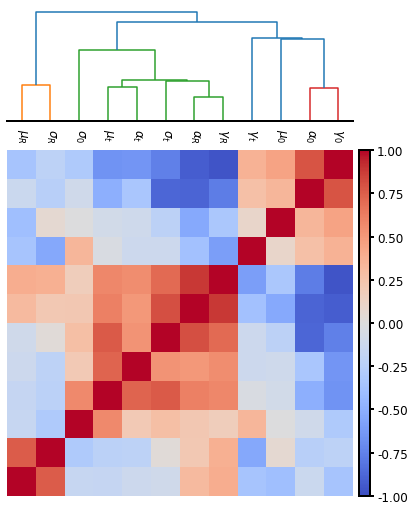

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))


# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.75, 0.6, 0.2])
correlations = df.corr()


Y = linkage(correlations)
# Y = linkage(df, method='ward')
Z2 = dendrogram(Y, labels=df.columns, orientation='top', leaf_rotation=270)
# ax2.set_xticks([])
# ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
correlations = correlations.to_numpy()
correlations = correlations[Z2['leaves'], :]
correlations = correlations[:, Z2['leaves']]
im = axmatrix.matshow(correlations, aspect='auto', origin='lower', cmap='coolwarm', vmin=-1, vmax=1)
axmatrix.set_xticks([])
axmatrix.spines['bottom'].set_visible(False)
axmatrix.set_yticks([])
axmatrix.spines['left'].set_visible(False)

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

# dissimilarity matrix

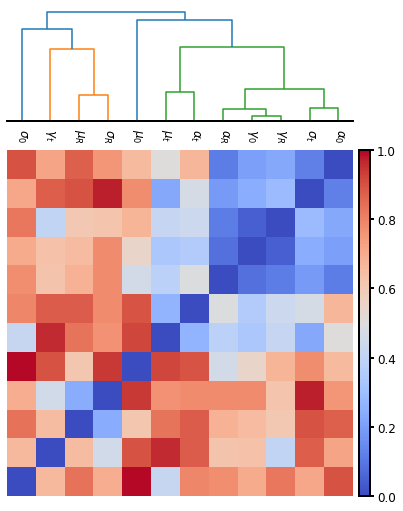

In [70]:

from scipy.spatial.distance import squareform
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8, 8))


# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3, 0.75, 0.6, 0.2])
correlations = df.corr()

dissimilarity = 1 - abs(correlations)
Y = linkage(squareform(dissimilarity), 'complete')




Z2 = dendrogram(Y, labels=df.columns, orientation='top', leaf_rotation=270)
# ax2.set_xticks([])
# ax2.spines['bottom'].set_visible(False)
ax2.set_yticks([])
ax2.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.3, 0.1, 0.6, 0.6])
dissimilarity = dissimilarity.to_numpy()
dissimilarity = dissimilarity[Z2['leaves'], :]
dissimilarity = dissimilarity[:, Z2['leaves']]
im = axmatrix.matshow(dissimilarity, aspect='auto', origin='lower', cmap='coolwarm', vmin=0, vmax=1)


axmatrix.set_xticks([])
axmatrix.spines['bottom'].set_visible(False)
axmatrix.set_yticks([])
axmatrix.spines['left'].set_visible(False)

# Plot colorbar.
axcolor = fig.add_axes([0.91, 0.1, 0.02, 0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

# PCA

             PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
RatF00 -0.252501 -0.291721 -0.165798  0.145063  0.308020 -0.063804  0.196605   
RatF01 -0.199029 -0.071854  0.042109  0.105841 -0.171156 -0.058842 -0.227094   
RatF02 -0.174023 -0.063877 -0.705397 -0.255352 -0.157655 -0.066034  0.208892   
RatM00  0.313107  0.188294 -0.029644 -0.236465 -0.008439 -0.560389 -0.207658   
RatM01  0.076407  0.168814  0.253096  0.019916 -0.037254 -0.210048  0.039905   
RatM02  0.121619  0.047294 -0.011400  0.084876 -0.691275  0.159855  0.120922   
RatF30  0.212387 -0.094225  0.093435 -0.560825 -0.066164  0.511923 -0.103020   
RatF31 -0.177340 -0.060220  0.012739  0.022071  0.005111  0.284470  0.028870   
RatF32 -0.162161 -0.123067  0.356017 -0.311266  0.002151 -0.169131  0.109643   
RatF33 -0.264733 -0.112383  0.026831  0.100299 -0.092977  0.089473 -0.317960   
RatM30  0.230518 -0.260416  0.135778 -0.289239 -0.064271 -0.092675  0.374310   
RatM31  0.352622  0.204741 -0.075517  0.

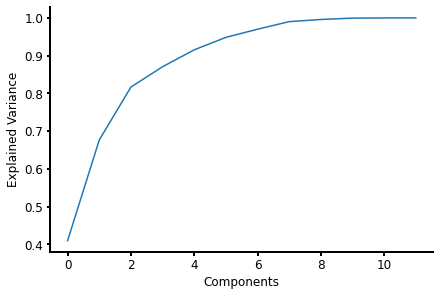

In [74]:
from sklearn.decomposition import PCA

df_normalized = df.T
pca = PCA(n_components=df_normalized.shape[0])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(df_normalized.T.columns))],
                            index=df_normalized.columns)
print(loadings)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

Text(0, 0.5, 'PC1 (0.27)')

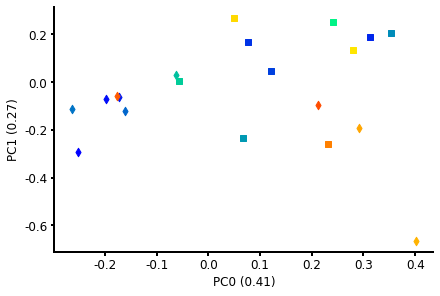

In [86]:
fig, ax = plt.subplots()
for animal in animalList:
    ax.scatter(loadings.PC0[animal], loadings.PC1[animal], color=rat_markers[animal][0], marker=rat_markers[animal][1])

ax.set_xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
ax.set_ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')

# PCA parameters

                 PC0       PC1       PC2       PC3       PC4       PC5  \
$\mu_0$     0.156589  0.767131  0.154607  0.195904 -0.150502  0.351862   
$\mu_t$     0.306695 -0.043851  0.371246 -0.114167 -0.306555 -0.122187   
$\mu_R$     0.228468  0.151992 -0.619049 -0.310015 -0.223805 -0.405825   
$\sigma_0$  0.266284  0.429641  0.276853 -0.269588  0.356337 -0.285565   
$\sigma_t$  0.342701 -0.082123  0.124582  0.324349 -0.079673 -0.110328   
$\sigma_R$  0.205635  0.143627 -0.420867  0.450128 -0.311153 -0.066920   
$\alpha_0$ -0.328483  0.245863 -0.033296 -0.563540 -0.263445  0.011247   
$\alpha_t$  0.173806 -0.259286  0.310652 -0.181942 -0.626416  0.100026   
$\alpha_R$  0.369033 -0.180266 -0.055070 -0.128583  0.363900  0.071583   
$\gamma_0$ -0.395973  0.083289  0.005232  0.177031 -0.058150  0.018938   
$\gamma_t$ -0.082429  0.051630  0.267050  0.191306 -0.025360 -0.710911   
$\gamma_R$  0.400874 -0.068879 -0.117321 -0.191914  0.069972  0.278140   

                 PC6       PC7       

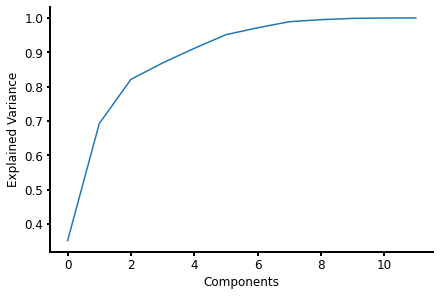

In [94]:

df_normalized = df
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
                            columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
                            index=df.columns)
print(loadings)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

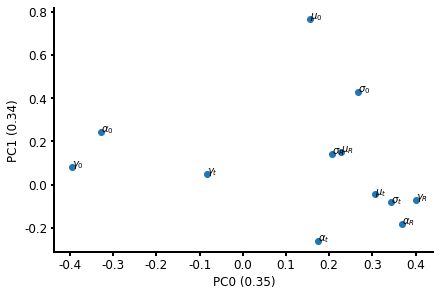

In [91]:
plt.scatter(loadings.PC0, loadings.PC1)
plt.xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')
for i, txt in enumerate(loadings.index):
    plt.annotate(txt, (loadings.PC0[i], loadings.PC1[i]))
plt.show()

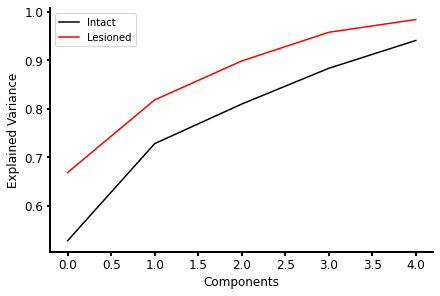

In [108]:
# PCA PARAMETERS
all_traits = { key:traitsRUN.get(key,[])+traitsIDLE.get(key,[]) for key in set(list(traitsRUN.keys())+list(traitsIDLE.keys())) }

N = 5
df_normalized_intact = pd.DataFrame(all_traits, columns=intact, index=ylabelsRUN+ylabelsIDLE).T
# pca_intact = PCA(n_components=df_normalized_intact.shape[1])
pca_intact = PCA(n_components=N)
pca_intact.fit(df_normalized_intact)

loadings_intact = pd.DataFrame(pca_intact.components_.T,
                            columns=['PC%s' % _ for _ in range(N)],
                            index=df_normalized_intact.columns)


df_normalized_lesioned = pd.DataFrame(all_traits, columns=lesion, index=ylabelsRUN+ylabelsIDLE).T
pca_lesioned = PCA(n_components=N)
pca_lesioned.fit(df_normalized_lesioned)

loadings_lesioned = pd.DataFrame(pca_lesioned.components_.T,
                            columns=['PC%s' % _ for _ in range(N)],
                            index=df_normalized_lesioned.columns)


plt.plot(np.cumsum(pca_intact.explained_variance_ratio_), color='k', label='Intact')
plt.plot(np.cumsum(pca_lesioned.explained_variance_ratio_), color='r', label='Lesioned')
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.legend()
plt.show()

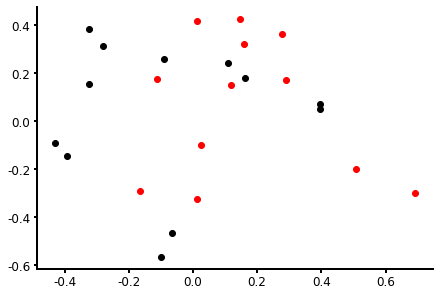

In [109]:
plt.scatter(loadings_intact.PC0, loadings_intact.PC1, color='k', label='Intact')
plt.scatter(loadings_lesioned.PC0, loadings_lesioned.PC1, color='r', label='Lesioned')
# plt.xlabel(f'PC0 ({pca.explained_variance_ratio_[0]:.2f})')
# plt.ylabel(f'PC1 ({pca.explained_variance_ratio_[1]:.2f})')
# for i, txt in enumerate(loadings.index):
#     plt.annotate(txt, (loadings.PC0[i], loadings.PC1[i]))
# plt.show()